## Prepare Notebook

**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set Notebook Preferences**

In [2]:
#Set Pandas preferenes
pd.options.display.max_rows = 100

#Set style for matplotlib and fontdict for plots
plt.style.use('seaborn-dark')
title_dict= {'fontsize':18,
            'style': 'italic',
            'fontweight': 'semibold'}

label_dict= {'fontsize':14,
             'fontweight': 'semibold'}

#Surpress annoying warnings
warnings.filterwarnings('ignore')

**Read in data**

In [3]:
#Set path to data
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Read in training and test data
X_train = pd.read_csv(path + '/2020_0624_Training_Data.csv', index_col=0)
X_test = pd.read_csv(path + '/2020_0624_Test_Data.csv', index_col=0)

#Read in price forecasts data
price_forecasts = pd.read_csv(path + '/2020_0620_Data_Price_Forecasts.csv', index_col=0)

**Preview Data**

In [4]:
print('Training data shape:', X_train.shape)
display(X_train.head())

print('\nTest data shape:',X_test.shape)
display(X_test.head())

print('\nPrice forecasts shape:',price_forecasts.shape)
display(price_forecasts.head())

Training data shape: (29789, 20)


,generation fossil gas,generation fossil gas season,generation fossil gas stationary,generation fossil gas trend,generation fossil hard coal,generation fossil hard coal season,generation fossil hard coal stationary,generation fossil hard coal trend,generation hydro pumped storage consumption,generation hydro pumped storage consumption season,generation hydro pumped storage consumption stationary,generation hydro pumped storage consumption trend,price actual,price actual season,price actual stationary,price actual trend,total load actual,total load actual season,total load actual stationary,total load actual trend
date_time,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,3784.0,383.381984,-821.652818,4222.270833,4220.0,181.521023,-134.521023,4173.000000,972.0,-238.648681,131.336181,1079.3125,60.12,3.750959,-5.750750,62.119792,24133.0,2352.743184,-2151.597351,23931.854167
2015-01-01 13:00:00,3754.0,402.106788,-788.106788,4140.000000,4404.0,219.642515,159.169985,4025.187500,922.0,-269.700629,81.075629,1110.6250,62.05,3.292118,-3.198368,61.956250,24713.0,2856.356263,-2121.835430,23978.479167
2015-01-01 14:00:00,3779.0,363.470608,-633.241441,4048.770833,4256.0,220.103358,159.104975,3876.791667,941.0,-254.936512,30.936512,1165.0000,62.06,2.675646,-2.233563,61.617917,24672.0,3004.248460,-2332.248460,24000.000000
2015-01-01 15:00:00,3708.0,299.567702,-568.192702,3976.625000,4038.0,198.556871,101.672295,3737.770833,1069.0,-215.064849,50.314849,1233.7500,59.76,1.874951,-3.437243,61.322292,23528.0,2840.023129,-3348.148129,24036.125000
2015-01-01 16:00:00,3813.0,254.578554,-363.724387,3922.145833,4191.0,159.866135,415.279699,3615.854167,970.0,-162.463163,-168.099337,1300.5625,61.18,1.011884,-1.000426,61.168542,23118.0,2473.497661,-3455.914328,24100.416667



Test data shape: (5257, 20)


,generation fossil gas,generation fossil gas season,generation fossil gas stationary,generation fossil gas trend,generation fossil hard coal,generation fossil hard coal season,generation fossil hard coal stationary,generation fossil hard coal trend,generation hydro pumped storage consumption,generation hydro pumped storage consumption season,generation hydro pumped storage consumption stationary,generation hydro pumped storage consumption trend,price actual,price actual season,price actual stationary,price actual trend,total load actual,total load actual season,total load actual stationary,total load actual trend
date_time,,,,,,,,,,,,,,,,,,,,
2018-05-26 14:00:00,6048.0,258.836710,24.309123,5764.854167,4527.0,145.805831,-24.743331,4405.937500,194.0,-118.820125,129.695125,183.125000,66.61,0.535144,-0.877644,66.952500,27714.0,2141.914399,582.731434,24989.354167
2018-05-26 15:00:00,5663.0,334.864589,-418.343756,5746.479167,4094.0,146.633903,-439.425570,4386.791667,194.0,-115.247777,129.664444,179.583333,60.59,0.799412,-7.262954,67.053542,26342.0,1921.311927,-484.686927,24905.375000
2018-05-26 16:00:00,5466.0,472.511350,-730.323850,5723.812500,3676.0,178.528238,-872.340738,4369.812500,463.0,-163.521222,447.250389,179.270833,56.99,2.340335,-12.490127,67.139792,25461.0,1993.187712,-1355.937712,24823.750000
2018-05-26 17:00:00,5289.0,651.289261,-1068.997594,5706.708333,3610.0,226.480108,-968.334274,4351.854167,492.0,-240.648377,552.085877,180.562500,56.71,4.743248,-15.208039,67.174792,25063.0,2323.286685,-2007.453351,24747.166667
2018-05-26 18:00:00,5351.0,770.538148,-1106.621481,5687.083333,3880.0,260.865653,-712.198986,4331.333333,280.0,-308.219652,402.886319,185.333333,59.06,5.793649,-13.923441,67.189792,24944.0,2489.289653,-2213.977153,24668.687500



Price forecasts shape: (35070, 1)


,price_forecast
date_time,
2015-01-01 00:00:00,50.10
2015-01-01 01:00:00,48.10
2015-01-01 02:00:00,47.33
2015-01-01 03:00:00,42.27
2015-01-01 04:00:00,38.41


**Prepare data for univariate analysis**

In [6]:
#Set Univariate variable for model training
X_train_univariate = X_train['price actual stationary']

#Set actual as target
actual = X_test['price actual']

#Check
print('Univariate training data shape{}\nLabel shape{}\n'.format(X_train_univariate.shape,actual.shape))
display(X_train_univariate.head())

Univariate training data shape(29789,)
Label shape(5257,)



date_time
2015-01-01 12:00:00   -5.750750
2015-01-01 13:00:00   -3.198368
2015-01-01 14:00:00   -2.233563
2015-01-01 15:00:00   -3.437243
2015-01-01 16:00:00   -1.000426
Name: price actual stationary, dtype: float64

### Base Model - Persistence Model Forecast

**Build Persistence Model Forecasts**

In [7]:
#Create list of historical values from price actual
history = [value for value in actual.values]

#Init empty list to store predictions
predictions = []

#Predictions are the previous actual record
for i in range(len(actual)):
    predictions.append(history[-1])
    history.append(actual[i])

#Store predictions in a data frame for later plotting
persistence_model_predictions = pd.DataFrame(predictions,index=actual.index)
persistence_model_predictions.columns = ['predictions']

#Check
display(persistence_model_predictions.head())

,predictions
date_time,
2018-05-26 14:00:00,71.81
2018-05-26 15:00:00,66.61
2018-05-26 16:00:00,60.59
2018-05-26 17:00:00,56.99
2018-05-26 18:00:00,56.71


**Evaluate Persistence Model**

Persistence Model Performance Metrics
MAE:1.9754612897089594
MAPE:0.029253484775499855
MSE:8.30429275252045
RMSE:2.8817169799479703


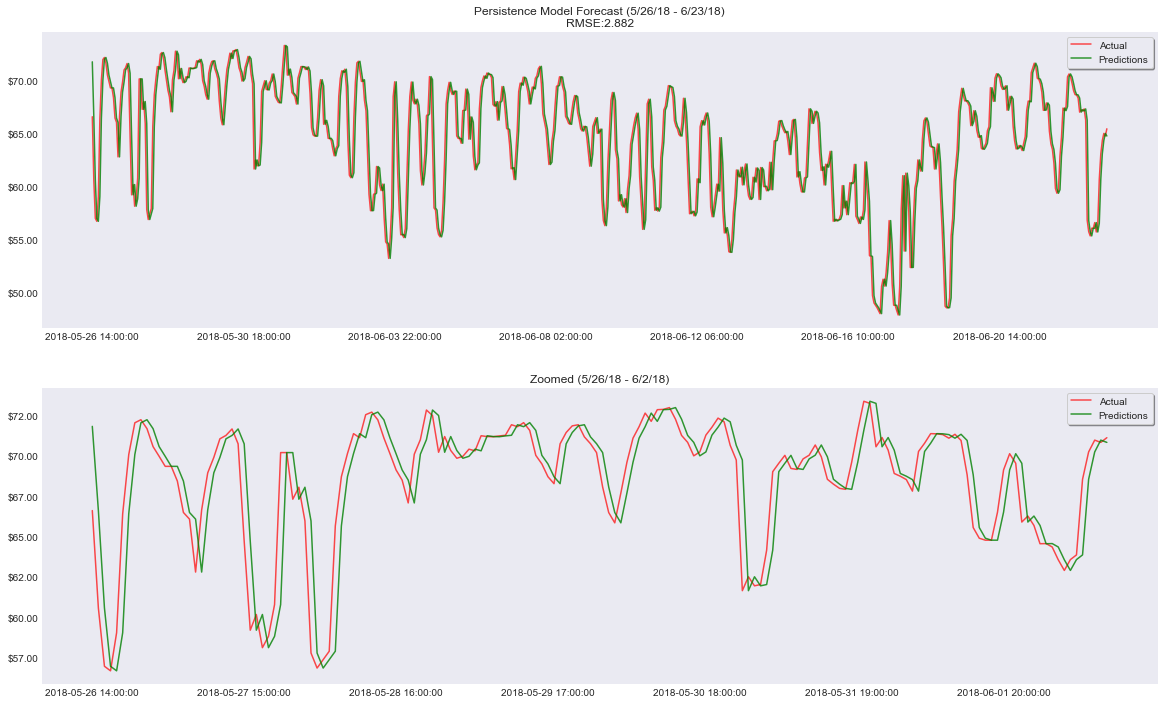

In [9]:
#Read in model_performance to capture metrics and timeseries_plot to plot timeseries
from TimeSeriesStats import model_performance
from TimeseriesPlotter import timeseries_plot

#Evaluate base model and store as metrics
metrics = model_performance(predictions,actual,'Persistence Model')

#Create fig
f, ax = plt.subplots(2,1,figsize = (20,12))

#Plot data 2 week zoom
timeseries_plot(actual[:24*28], ax=ax[0],color = 'red', alpha=.7)
timeseries_plot(persistence_model_predictions[:24*28], ax=ax[0], color = 'green',alpha=.8)

#Plot data 1 week zoom
timeseries_plot(actual[:24*7], ax=ax[1], color = 'red', alpha=.7)
timeseries_plot(persistence_model_predictions[:24*7], ax=ax[1], color = 'green', alpha=.8)

###Set plot aesthetics###
ax[0].set_title('Persistence Model Forecast (5/26/18 - 6/23/18)\nRMSE:{}'.format(round(metrics['RMSE'],3)))
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))
ax[0].legend(['Actual','Predictions'], frameon = True, shadow = True)

ax[1].set_title('Zoomed (5/26/18 - 6/2/18)')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:}.00".format(int(x))))
ax[1].legend(['Actual','Predictions'], frameon = True, shadow = True);

# Deep learning Univariate analysis

**Scale Data**

In [25]:
#Tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

#Create Target
Y = X_test['price actual stationary']

#Init scaler
scaler = MinMaxScaler()

#Fit and transform X_train_univariate and Y
X_scaled = scaler.fit_transform(X_train_univariate.values.reshape(-1,1))
Y_scaled = scaler.transform(Y.values.reshape(-1,1))

**Shape data for LSTM**

In [41]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [42]:
#Training is 24 time steps
training,target = split_sequence(X_scaled, 200)

#check
print(training.shape,target.shape)

(29589, 200, 1) (29589, 1)


In [45]:
#Declutter if needed
tf.keras.backend.clear_session()

#Init multistep LSTM
multi_step_LSTM = tf.keras.models.Sequential()

#Add layers to multi_step_LSTM
multi_step_LSTM.add(tf.keras.layers.LSTM(100, return_sequences = True, activation = 'relu', input_shape = (200,1)))
multi_step_LSTM.add(tf.keras.layers.LSTM(100, activation = 'relu' ))
multi_step_LSTM.add(tf.keras.layers.Dense(100))

#Compile
multi_step_LSTM.compile(optimizer="Adam", loss="mse")

In [ ]:
#Fit Data and store results
multi_step_history = multi_step_LSTM.fit(training, target, epochs = 5, verbose = 1)#10 epochs overfit

Epoch 1/5
125/925 [===>..........................] - ETA: 2:54 - loss: nan

**Evaluate Loss**

In [39]:
multi_step_history.history

{'loss': [0.02245044894516468,
  0.0063348738476634026,
  0.0031219031661748886,
  0.048471394926309586,
  0.004858096595853567,
  0.0021703504025936127,
  0.0016579709481447935,
  0.0015315883792936802,
  0.0013852993724867702,
  0.0013147862628102303]}

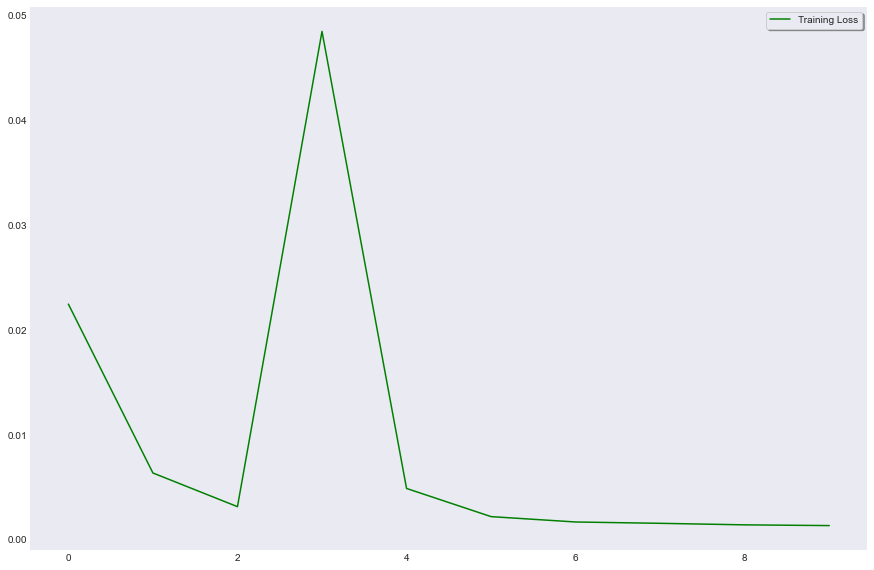

In [40]:
loss = multi_step_history.history['loss']
#val_loss = multi_step_history.history['']

epochs = range(len(loss))

#Create figure
f,ax = plt.subplots(figsize = (15,10))

ax.plot(epochs, loss, label = 'Training Loss', color = 'green')
#ax.plot(epochs, val_loss, label = 'Validation Loss', color = 'red')
ax.legend(shadow=True, frameon = True)

### Build Multivariate LSTM model

**Prepare data**